# Setup

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/gasia/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [3]:
plotly.tools.set_credentials_file(username='gasia4444', api_key='rC8FB3pveGzyME366dL7')

# Data

In [87]:
df = pd.read_csv('./TensorFlow/all_data_5_mins_pos_pol.csv', parse_dates=(['timestamp'])).set_index('timestamp')

In [88]:
df = df[~df['messages'].isnull()]

# delete

In [90]:
len(df), len(df[df.polarity_2 <0.1])

(141981, 62103)

In [91]:
df.polarity_2 = df.polarity_2 -0.1

-------------

In [147]:
df_data = df.close.values 
normalized_df_data = (df_data-min(df_data))/(max(df_data)-min(df_data))

In [148]:
df['normalized_data'] = normalized_df_data

In [149]:
dd = df['2018':]

Text(0.5,1,'polarity')

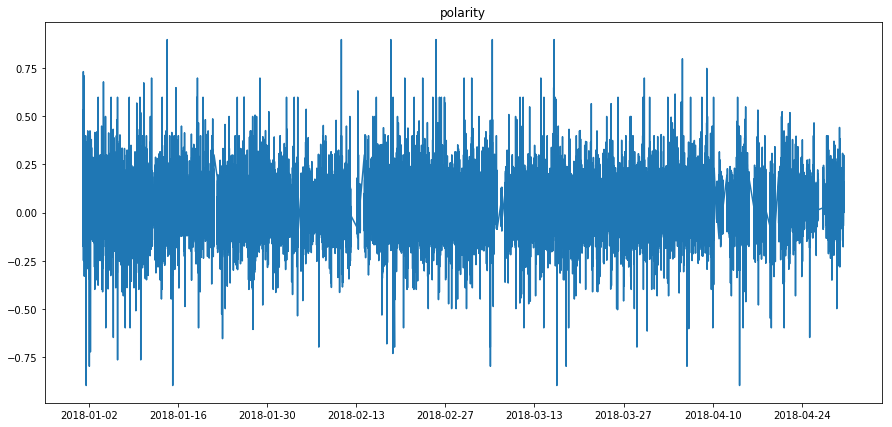

In [176]:
plt.figure(figsize = (15,7))
plt.plot(dd.polarity_2.index, dd.polarity_2.values)
plt.title('polarity')

In [236]:
dd = df['2018-02-24':'2018-02-25']

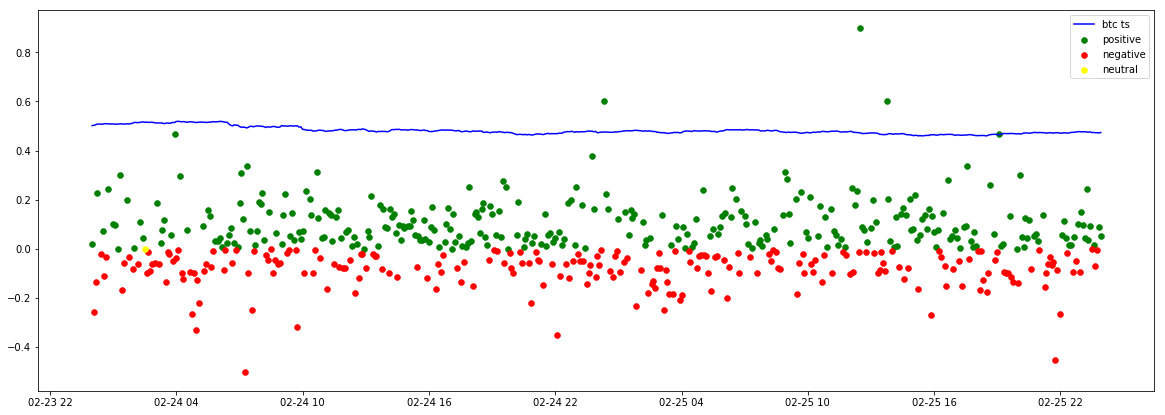

In [237]:
plt.figure(figsize=(20,7))
plt.plot(dd.normalized_data, color='b', label = 'btc ts')
# plt.scatter(x = dd[dd['polarity_2']>0].index,y = dd[dd['polarity_2']>0].normalized_data , color='g',linewidths=0.5, label ='positive')
# plt.scatter(x = dd[dd['polarity_2']<0].index,y = dd[dd['polarity_2']<0].normalized_data, color='r',linewidths=0.5, label ='negative')
# plt.scatter(x = dd[dd['polarity_2']==0].index,y = dd[dd['polarity_2']==0].normalized_data, color='yellow',linewidths=0.5, label ='neutral')


plt.scatter(x = dd[dd['polarity_2']>0].index,y = dd[dd['polarity_2']>0].polarity_2.values  , color='g',linewidths=0.5, label ='positive')
plt.scatter(x = dd[dd['polarity_2']<0].index,y = dd[dd['polarity_2']<0].polarity_2.values , color='r',linewidths=0.5, label ='negative')
plt.scatter(x = dd[dd['polarity_2']==0].index,y = dd[dd['polarity_2']==0].polarity_2.values , color='yellow',linewidths=0.5, label ='neutral')


# plt.plot(dd.polarity_2.index,( dd.polarity_2.values -1 ) )
# plt.plot(dd.polarity_2.index,( dd.polarity_2.values -1 ) )
# plt.scatter(x = dd[dd['polarity_2']>0].index,y = dd[dd['polarity_2']>0].polayrity, color='g',linewidths=3, label ='positive')

plt.legend()
plt.show()

In [247]:
dd = df['2018-02-24 16:00:00':'2018-02-25']

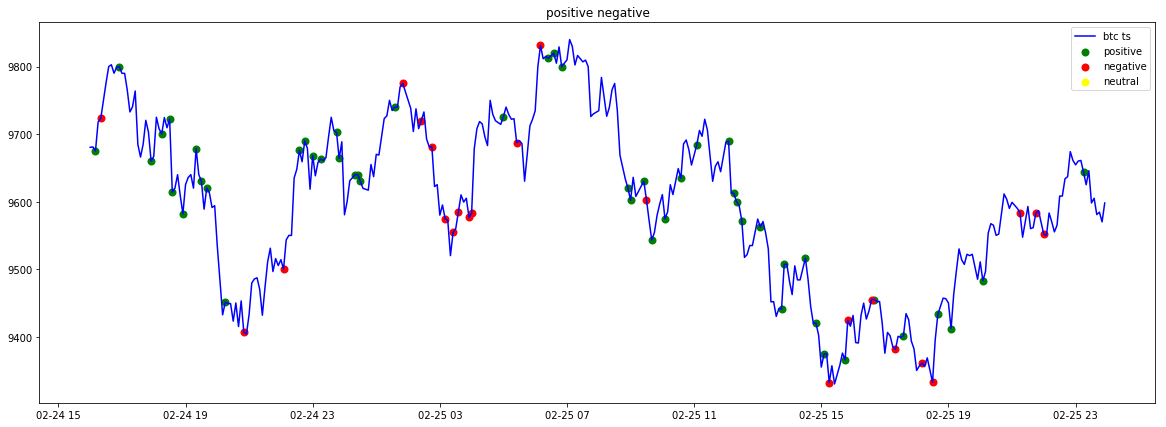

In [248]:
plt.figure(figsize=(20,7))
plt.plot(dd.close, color='b', label = 'btc ts')
plt.scatter(x = dd[dd['polarity_2']>0.15].index,y = dd[dd['polarity_2']>0.15].close , color='g',linewidths=2, label ='positive')
plt.scatter(x = dd[dd['polarity_2']<-0.15].index,y = dd[dd['polarity_2']<-0.15].close , color='r',linewidths=2, label ='negative')
plt.scatter(x = dd[dd['polarity_2']==0].index,y = dd[dd['polarity_2']==0].close, color='yellow',linewidths=2, label ='neutral')

plt.title('positive negative')
plt.legend()
plt.show()

In [190]:
dd = df['2018':'2018-02-12']

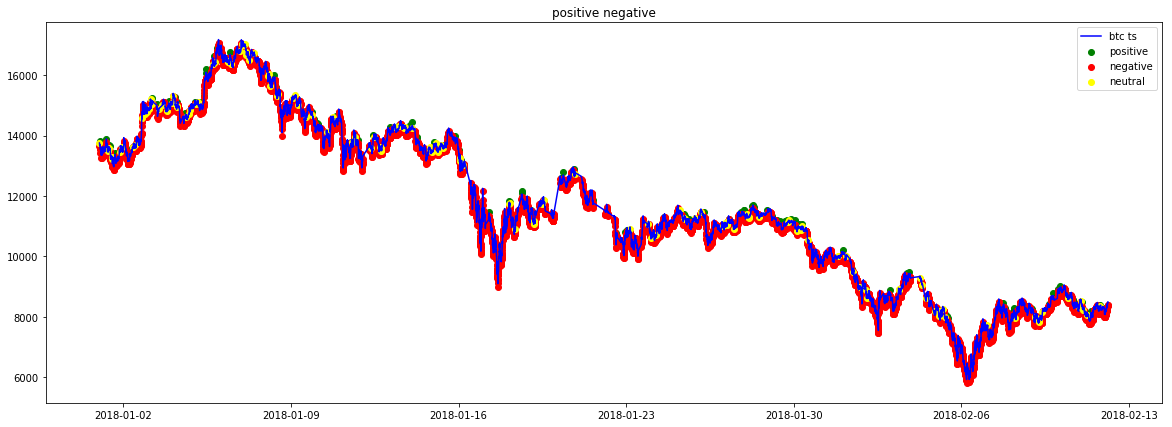

In [199]:
plt.figure(figsize=(20,7))
plt.plot(dd.close, color='b', label = 'btc ts')

plt.scatter(x = dd[dd['polarity']>0.4].index,y = dd[dd['polarity']>0.4].close + 100, color='g',linewidths=1, label ='positive')
plt.scatter(x = dd[dd['polarity']<0.4].index,y = dd[dd['polarity']<0.4].close -100, color='r',linewidths=1, label ='negative')
plt.scatter(x = dd[dd['polarity']==0].index,y = dd[dd['polarity']==0].close, color='yellow',linewidths=1, label ='neutral')

plt.title('positive negative')
plt.legend()
plt.show()

# Correlation

In [249]:
np.corrcoef(df.polarity_2.values, df.close.values )

array([[1.        , 0.02569469],
       [0.02569469, 1.        ]])